# Advanced ML 

## Bayesian Networks - Sports Bayes Net

Bayesian Belief Network or Bayesian Network or Belief Network is a Probabilistic Graphical Model (PGM) that represents conditional dependencies between random variables through a Directed Acyclic Graph (DAG).

Bayesian Networks are applied in many fields. For example, disease diagnosis, optimized web search, spam filtering, gene regulatory networks, etc.

In [1]:
import networkx as nx
import pylab as plt
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.models import BayesianModel

## A - Set up the model

### 1. Set the structure

In [2]:
model = BayesianModel([('Genetics', 'Performance'),
                             ('Practice', 'Performance'),
                             ('Performance', 'Offer')])

### 2. Visualize the model

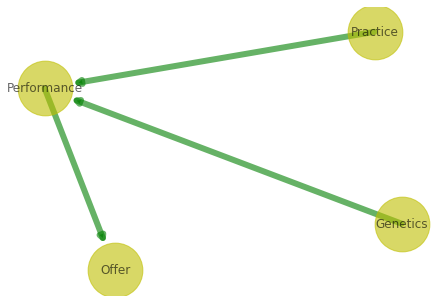

In [3]:
options = {
    'node_color': 'y',
    'node_size': 3000,
    'width': 6,
    'alpha':0.6,
    'edge_color':'g'
}

nx.draw(model, with_labels=True, **options)
plt.show()

###  3.Set up the relationships (the CPDs)

In [4]:
genetics_cpd = TabularCPD(
                variable = 'Genetics',
                variable_card = 2,
                values = [[.2,.8]])

In [5]:
practice_cpd = TabularCPD(
                variable = 'Practice',
                variable_card = 2,
                values = [[.7,.3]])

In [6]:
offer_cpd = TabularCPD(
                    variable = 'Offer',
                    variable_card = 2,
                    values = [[.95, .8, .5],
                             [.05, .2, .5]],
                    evidence = ['Performance'],
                    evidence_card = [3])

In [7]:
olympic_trials_cpd = TabularCPD(
                        variable = 'Performance', 
                        variable_card = 3,
                        values = [[.5, .8, .8, .9],
                                 [.3, .15, .1, .08],
                                 [.2, .05, .1, .02]],
                        evidence = ['Genetics', 'Practice'],
                        evidence_card = [2,2])

### 4. Add relationships to the model

In [8]:
model.add_cpds (genetics_cpd, practice_cpd, offer_cpd, olympic_trials_cpd)

### 5. Examine the structure of your graph

### 6. Find active trail nodes

### 7. Find local independencies

### 8. Get all independencies

## B - Making inferences

### 1. Get probability distributions that are not explicitly spelled out in our graphs

In [9]:
from pgmpy.inference import VariableElimination

In [10]:
infer = VariableElimination(model)

In [11]:
#prob_offer = 
#print(prob_offer)

### 2. Get conditional probability distributions that take into account what we already know

## Probability Queries


In [12]:
#prob_offer_good_genes = 
#print(prob_offer_good_genes)

In [13]:
#prob_offer_bad_genes =
#print(prob_offer_bad_genes)

In [14]:
#prob_offer_good_genes_did_practice 
#print(prob_offer_good_genes_did_practice)

In [15]:
#prob_offer_good_genes_no_practice = 
#print(prob_offer_good_genes_no_practice)

### 3. Go upstream logically.

#### For example, evidence about performance at the Olympic Trials affects the probabilities of Genetics.

In [16]:
#prob_good_genes_if_amazing_olympic_trials = 
#print(prob_good_genes_if_amazing_olympic_trials)

### Some variables are only informative about other variables given 'third' variables

In [17]:
# Practice does not inherently tell us something about Genetics
#prob_good_genes_if_no_practice 
#print(prob_good_genes_if_no_practice)

In [18]:
# BUT Practice does tell us something about genetics IF we also 
# know something about olympic trials performance

#prob_good_genes_if_no_practice_good_olympic_trials = 
#print(prob_good_genes_if_no_practice_good_olympic_trials)

## Map Queries

1) Find the most probable state for Genetics

2) Find the most probable state for Offer and Performance
